In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 10
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("dark")

<Figure size 1008x720 with 0 Axes>

# Importing Datasets

### Raw Punk Attributes --> Datasets with unnested values

In [3]:
punk_attributes = pd.read_csv('raw_punks.csv')

In [4]:
punk_attributes

,Unnamed: 0,id,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,0,0,Female,2023,Mid,3,"Blonde Bob,Earring,Green Eye Shadow",1,Earring
1,1,1,Male,4352,Dark,2,"Mohawk,Smile",0,NaN
2,2,2,Female,8090,Light,1,Wild Hair,0,NaN
3,3,3,Male,7896,Dark,3,"Nerd Glasses,Pipe,Wild Hair",0,NaN
4,4,4,Male,7332,Mid,4,"Big Shades,Earring,Goat,Wild Hair",0,NaN
...,...,...,...,...,...,...,...,...,...
9995,9995,9995,Female,2466,Albino,2,"Purple Eye Shadow,Straight Hair Dark",0,NaN
9996,9996,9996,Male,4323,Light,4,"Cigarette,Crazy Hair,Earring,Smile",0,NaN
9997,9997,9997,Zombie,498,Zombie,2,"Cap Forward,Front Beard",0,NaN
9998,9998,9998,Female,1271,Mid,3,"Black Lipstick,Clown Eyes Green,Wild White Hair",0,NaN


### Punk Sales

In [5]:
sales = pd.read_csv('sales.csv')

In [8]:
sales['transaction_date'] = sales['transaction_date'].astype('datetime64')

In [9]:
sales

,Unnamed: 0,id,amount_ethereum,amount_dollars,transaction_date
0,0,5000,0.30,67.0,2017-08-03
1,1,5001,1.20,247.0,2017-07-29
2,2,5002,205.00,382579.0,2021-07-17
3,3,5002,49.00,11542.0,2020-06-01
4,4,5002,0.26,88.0,2017-10-13
...,...,...,...,...,...
7874,1534,9990,24.50,44981.0,2021-03-20
7875,1535,9997,99.99,169770.0,2021-02-08
7876,1536,9997,59.00,21062.0,2020-09-27
7877,1537,9998,38.00,61170.0,2021-03-03


### Aggregated DF

In [10]:
aggregated_df = pd.merge(sales, punk_attributes, on='id')

In [11]:
aggregated_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)

In [12]:
aggregated_df

,id,amount_ethereum,amount_dollars,transaction_date,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,5000,0.30,67.0,2017-08-03,Female,1249,Light,3,"Green Eye Shadow,Hot Lipstick,Wild White Hair",0,NaN
1,5001,1.20,247.0,2017-07-29,Female,312,Dark,2,"Hot Lipstick,Orange Side",0,NaN
2,5002,205.00,382579.0,2021-07-17,Male,74,Dark,4,"Beanie,Earring,Nerd Glasses,Pipe",0,NaN
3,5002,49.00,11542.0,2020-06-01,Male,74,Dark,4,"Beanie,Earring,Nerd Glasses,Pipe",0,NaN
4,5002,0.26,88.0,2017-10-13,Male,74,Dark,4,"Beanie,Earring,Nerd Glasses,Pipe",0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7874,9990,24.50,44981.0,2021-03-20,Male,9186,Albino,2,"Horned Rim Glasses,Mohawk",0,NaN
7875,9997,99.99,169770.0,2021-02-08,Zombie,498,Zombie,2,"Cap Forward,Front Beard",0,NaN
7876,9997,59.00,21062.0,2020-09-27,Zombie,498,Zombie,2,"Cap Forward,Front Beard",0,NaN
7877,9998,38.00,61170.0,2021-03-03,Female,1271,Mid,3,"Black Lipstick,Clown Eyes Green,Wild White Hair",0,NaN


# Visualizaciones

### Proportion of punks with registered sales vs universe (10K)

In [ ]:
(len(aggregated_df.id.value_counts())/10000).plot(kind='pie')

### Top 30 punks with highest price

In [92]:
current_price = aggregated_df.groupby('id').max().sort_values(by='amount_dollars', ascending=False)

Text(0.5, 1.0, 'Top 30 punks with highest recorded Sale (E)')

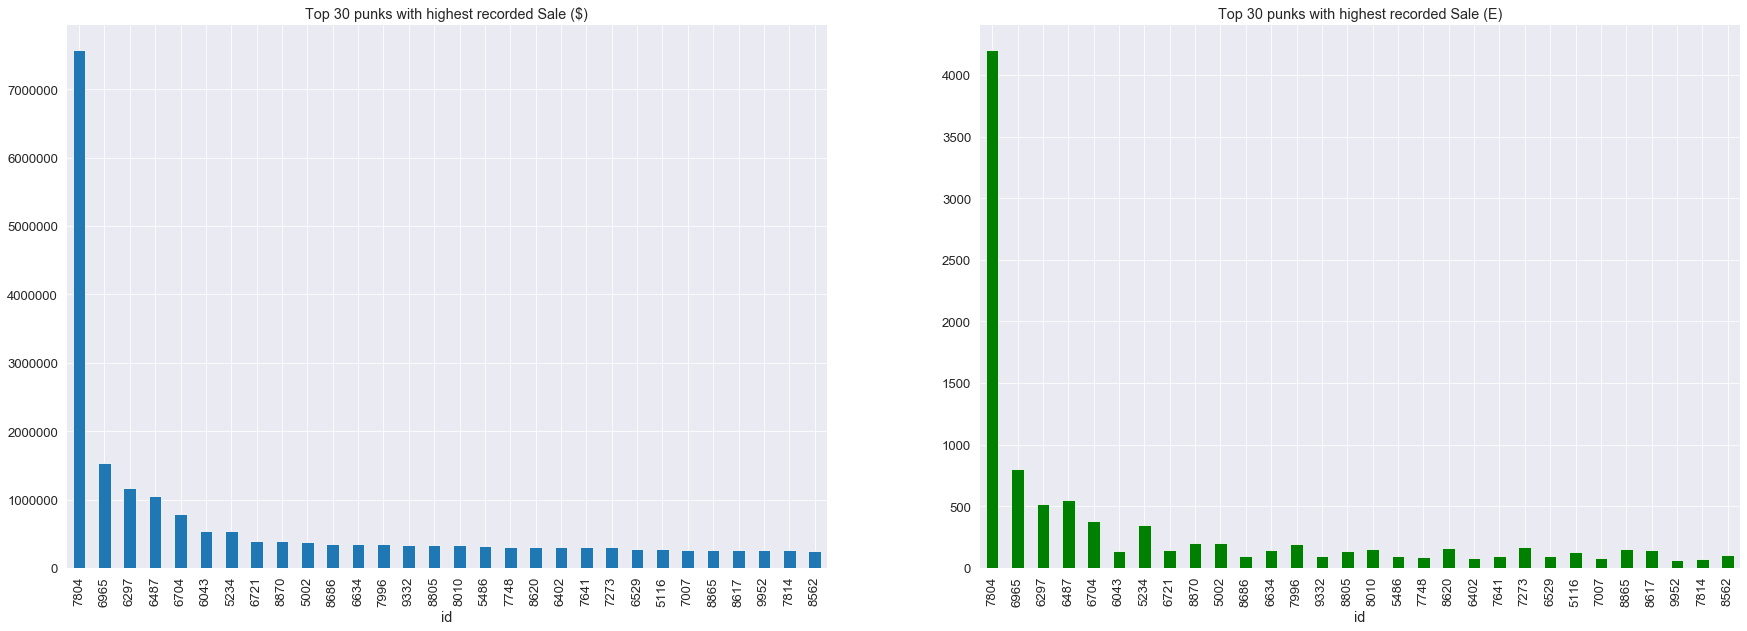

In [93]:
f, ax = plt.subplots(1, 2, figsize=[30, 10])
current_price.amount_dollars.head(30).plot(kind='bar', ax=ax[0], grid=True)
current_price.amount_ethereum.head(30).plot(kind='bar', ax=ax[1], color = 'green', grid=True)

ax[0].set_title('Top 30 punks with highest recorded Sale ($)')
ax[1].set_title('Top 30 punks with highest recorded Sale (E)')

### Cantidad de punks por Cantidad de Compras --> Cambiar tamaño, grid, Axis

In [15]:
current_price['transactioned'] = 1

In [61]:
transactions_by_punk = sales.groupby('id').count()['transaction_date'].reset_index()

AttributeError: 'Figure' object has no attribute 'set_xlabel'

<Figure size 1008x576 with 0 Axes>

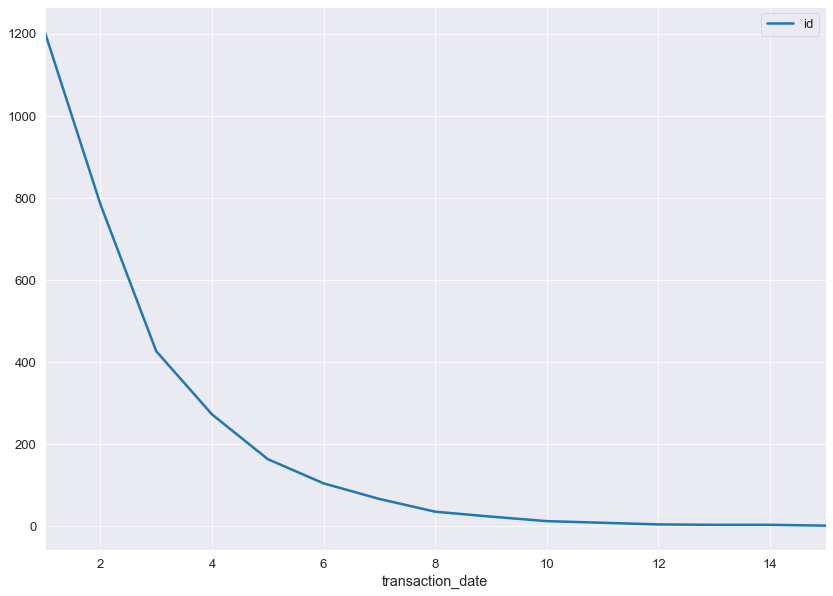

In [82]:
fig = plt.figure(figsize=(14,8))
transactions_by_punk.groupby('transaction_date').count().plot(grid=True)
fig.set_xlabel('X Axis')


### Visualización por tiempo

In [ ]:
plt.xlabel('Año')
plt.ylabel('Medición')
plt.title('Máximo valor contaminantes por año') 
out = sns.barplot(x='ano', y ='medicion' , data=data_tmp, hue='magnitud', palette="Set3", ci=0)

### Amount of transactions by Year

In [17]:
sales['year'] = sales['transaction_date'].dt.year

In [18]:
sales['month'] = sales['transaction_date'].dt.month

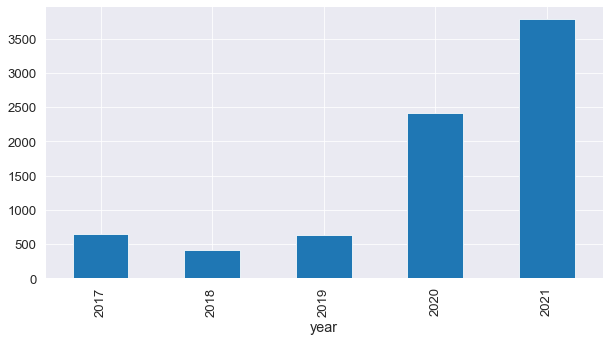

In [57]:
fig = plt.figure(figsize=(10,5))
sales.groupby('year').count()['id'].plot(kind='bar', grid=True)

In [53]:
sales_by_year = sales.groupby('year').count()[['id']].reset_index()

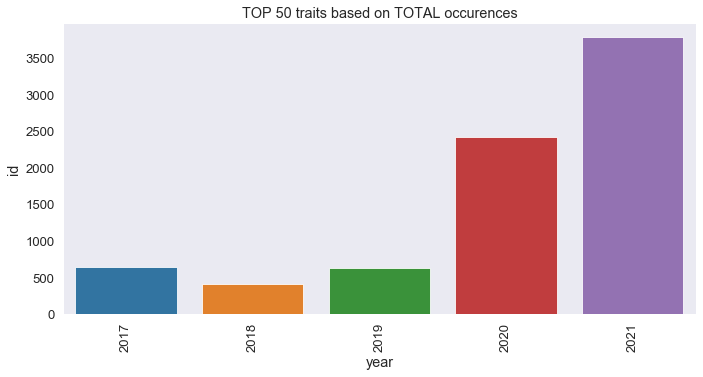

In [49]:
sns.catplot(x='year',y='id', data=sales_by_year, kind='bar',height=5, aspect=10/5)
plt.title('TOP 50 traits based on TOTAL occurences')
plt.xticks(rotation=90)
plt.show()

### Transactions over time --> Do the same with MONTHs and change size!

In [ ]:
fig = plt.figure(figsize=(30,5))
ax = fig.gca()
delayed_flights.groupby('CRSDepTime')['ArrDelay'].median().plot(title='ArrDelay across all departure hours of the day', ax=ax)
ax.set_ylim(0,200)
plt.show()

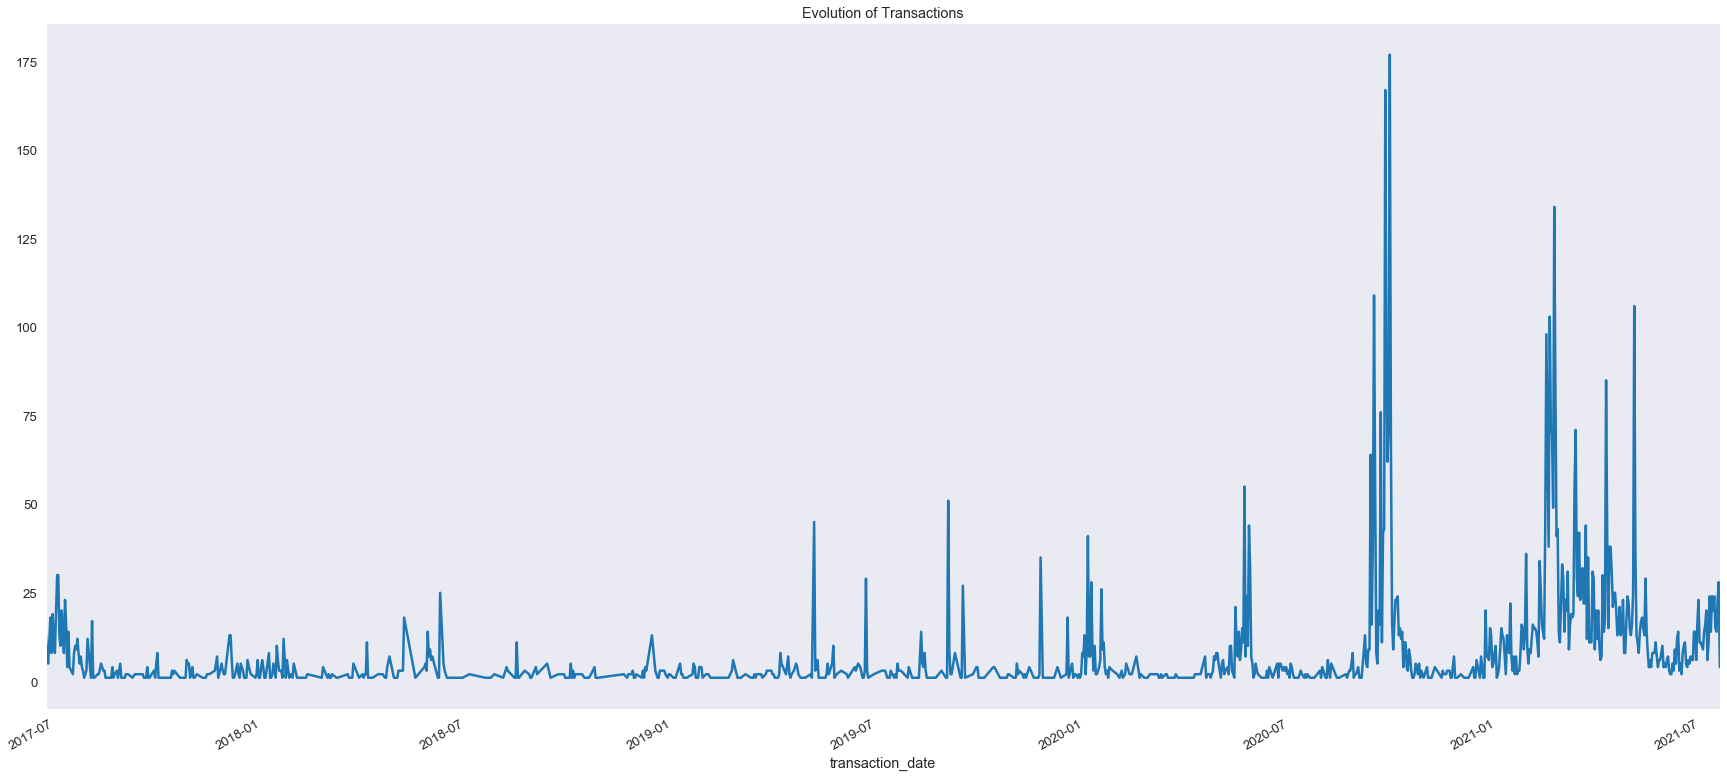

In [72]:
fig = plt.figure(figsize=(30,14))
sales.groupby('transaction_date').count()['id'].plot(title='Evolution of Transactions')

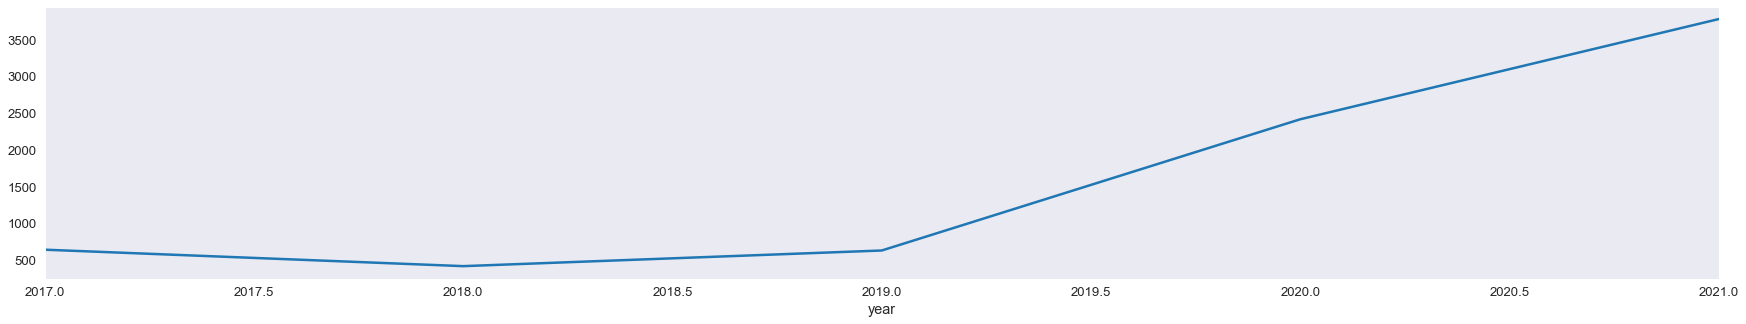

In [71]:
fig = plt.figure(figsize=(30,5))
sales.groupby(['year']).count()['id'].plot()

### Cantidad de transacciones por Punk Type

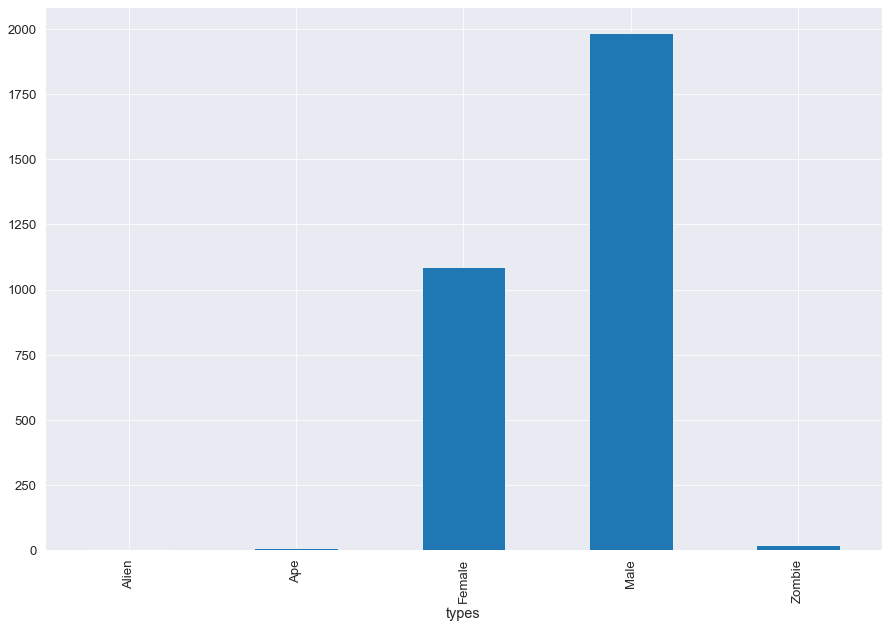

In [90]:
fig = plt.figure(figsize=(15,10))

current_price.groupby('types').count()['amount_ethereum'].plot(kind='bar', grid=True)

In [102]:
aggregated_df

,id,amount_ethereum,amount_dollars,transaction_date,types,rarity,skin,total_traits,traits,total_hidden_traits,hidden_traits
0,5000,0.30,67.0,2017-08-03,Female,1249,Light,3,"Green Eye Shadow,Hot Lipstick,Wild White Hair",0,NaN
1,5001,1.20,247.0,2017-07-29,Female,312,Dark,2,"Hot Lipstick,Orange Side",0,NaN
2,5002,205.00,382579.0,2021-07-17,Male,74,Dark,4,"Beanie,Earring,Nerd Glasses,Pipe",0,NaN
3,5002,49.00,11542.0,2020-06-01,Male,74,Dark,4,"Beanie,Earring,Nerd Glasses,Pipe",0,NaN
4,5002,0.26,88.0,2017-10-13,Male,74,Dark,4,"Beanie,Earring,Nerd Glasses,Pipe",0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7874,9990,24.50,44981.0,2021-03-20,Male,9186,Albino,2,"Horned Rim Glasses,Mohawk",0,NaN
7875,9997,99.99,169770.0,2021-02-08,Zombie,498,Zombie,2,"Cap Forward,Front Beard",0,NaN
7876,9997,59.00,21062.0,2020-09-27,Zombie,498,Zombie,2,"Cap Forward,Front Beard",0,NaN
7877,9998,38.00,61170.0,2021-03-03,Female,1271,Mid,3,"Black Lipstick,Clown Eyes Green,Wild White Hair",0,NaN


### Media de precio por año

Text(0.5, 1.0, 'Average Price by Year (E)')

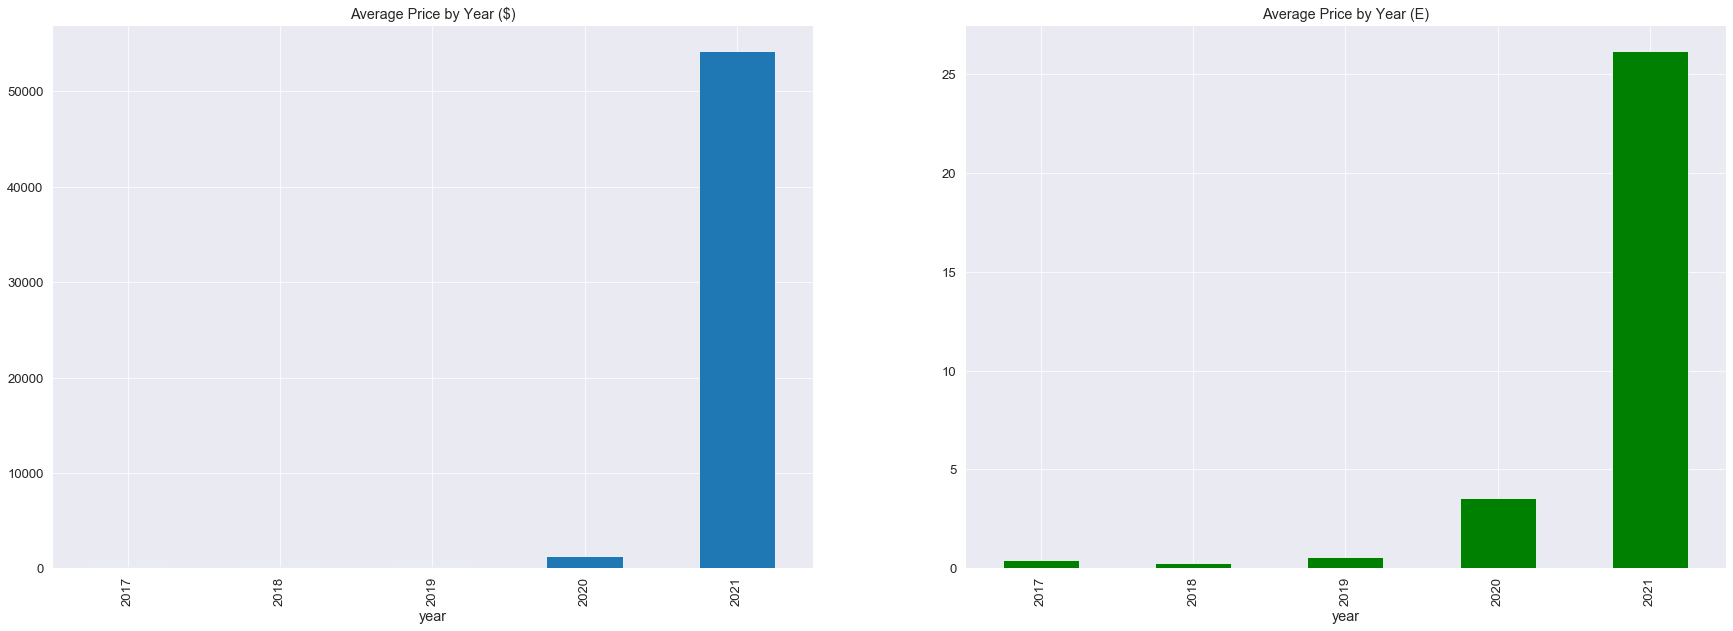

In [107]:


f, ax = plt.subplots(1, 2, figsize=[30, 10])
sales.groupby('year').mean()['amount_dollars'].plot(kind='bar', ax=ax[0], grid=True)
sales.groupby('year').mean()['amount_ethereum'].plot(kind='bar', ax=ax[1], color = 'green', grid=True)

ax[0].set_title('Average Price by Year ($)')
ax[1].set_title('Average Price by Year (E)')

### Media de precio por año por Punk Type

In [91]:
current_type_price = current_price.groupby('types').mean()[['amount_ethereum', 'amount_dollars']].reset_index()

Text(0.5, 1.0, 'Average Price by Type (E)')

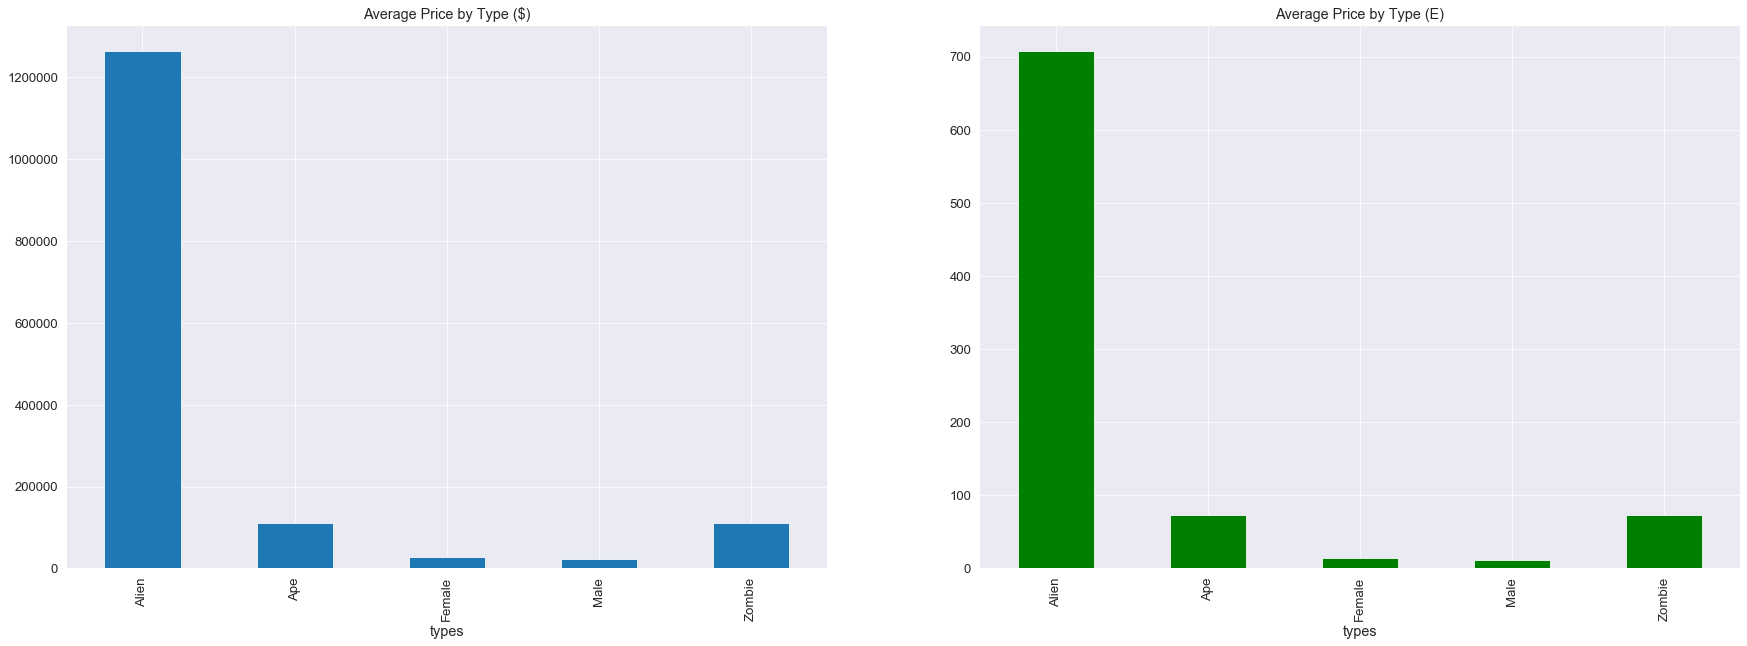

In [99]:
f, ax = plt.subplots(1, 2, figsize=[30, 10])
aggregated_df.groupby('types').mean()['amount_dollars'].plot(kind='bar', ax=ax[0], grid=True)
aggregated_df.groupby('types').mean()['amount_ethereum'].plot(kind='bar', ax=ax[1], color = 'green', grid=True)

ax[0].set_title('Average Price by Type ($)')
ax[1].set_title('Average Price by Type (E)')

### Media por Skin Type

In [ ]:
sales.groupby

### Maximo y Minimo por Punk Type

### Current price analysis (need to remove other prices different than current date)

In [ ]:
current_price_df = aggregated_df.groupby('id').apply(lambda aggregated_df: aggregated_df.loc[aggregated_df.total_traits.idxmax()]).sort_values(by='total_traits', ascending=False)
current_price_df

In [ ]:
# Price percentile boxes (name?) --> Ojo el hue! 
# Tabla tiene que tener un único valor posible de fecha para cada precio. 

In [ ]:
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)

##### Current price evolution

In [ ]:
Need to create DF with mean price

In [ ]:
Graf with evolution over time

In [ ]:
Eje X con meses y hue/col con año (de manera que sean 3 series temporales mostradas - 3 lineas)
Eje Y precio. 

In [ ]:
aggregated_df.groupby('transaction_date')['amount_ethereum'].mean().plot()

### Historical price analysis --> Evolution: mean/median price for first purchase vs 2nd, 3rd, etc

### Dia de la semana con mayor cantidad de Compras

### Evolución cantidad de compras

# WORK WITH RANGES?